In [ ]:
# Funções de plotar gráfico
# implementação da função AND e OR

import numpy as np
import matplotlib.pyplot as plt


In [ ]:
#função de ativação
def degree(u):
    return np.where(u < 0, 0, 1)

#implementação do perceptron
def yperceptron(w,b,x, activation_function = degree):
    u = np.dot(w,x) + b                                                           #implementa a multiplicação de todos os valores de w e x
    y = activation_function(u)
    return y


In [ ]:
def treina_perceptron(W, b, X, yd, alfa, max_epoch, error_tolerance):
    n = np.size(X, 1)                                                             #numero de amostras de X
    SEQ = error_tolerance                                                         #SEQ = somatório dos erros quadraticos
    epoch = 1                                                                     #começa na época 1
    vec_SEQ = []

    while(epoch <= max_epoch and SEQ >= error_tolerance):
      SEQ = 0                                                                     #inicializa SEQ da época
      for i in range(n):                                                          #para cada amostra de X
        y_i = yperceptron(W, b, X[:, i])                                          #determinar a saida do neuronio para a amostra i
        error_i = yd[i] - y_i                                                     #determinar o erro
        W = W + alfa * error_i * X[:, i].T                                         #atualiza o vetor de pesos
        b = b + alfa * error_i                                                     #atualiza o bias
        SEQ = SEQ + error_i ** 2                                                   #acumula o SEQ
      vec_SEQ.append(SEQ.item())                                                   #salva SEQ da epoca  - Essa alteração (.item()) garante que o valor de SEQ seja adicionado à lista como um escalar, eliminando as dimensões extras.
      epoch = epoch + 1

    return (W, b, vec_SEQ)


In [ ]:
def plot_SEQ(vec_SEQ):
    plt.figure()
    plt.plot(range(1, len(vec_SEQ) + 1), vec_SEQ, marker='o')
    plt.title('Soma dos Erros Quadráticos (SEQ) por Época')
    plt.xlabel('Épocas')
    plt.ylabel('SEQ')
    plt.grid(True)
    plt.show()


In [ ]:
def plotadc2d(x, y):                                                            #plota os pontos, recebe x (x1,x2) e y (classificação)
    plt.scatter(x[0, :], x[1, :], marker="o", c=y[0,:], s=20)                   #passando y para color gera diferentes cores para cada classe - como y é um np.array precisa pegar somente a primeira linha
    plt.xlabel('x1')
    plt.ylabel('x2')

def plotareta(w, b, intervalo):                                                 #plota a reta, recebe w (pesos), b (bias) e o intervalo (min, max) para gerar a reta
    x1 = np.linspace(intervalo[0], intervalo[1], 10)                            #gera 10 pontos igualmente espaçados entre intervalo[0] e intervalo[1]
    x2 = -(w[0, 0] * x1 + b) / w[0, 1]                                          #calcula os valores de x2 para cada valor de x1
    plt.plot(x1.T, x2.T, '-')

def plotagrafico():                                                             #mostra o grafico
    plt.legend()
    plt.show()


In [ ]:
#declara x
x = np.array([[0, 1, 0, 1], [0, 0, 1, 1]])
print('x: \n', x)


x: 
 [[0 1 0 1]
 [0 0 1 1]]


Resultados AND


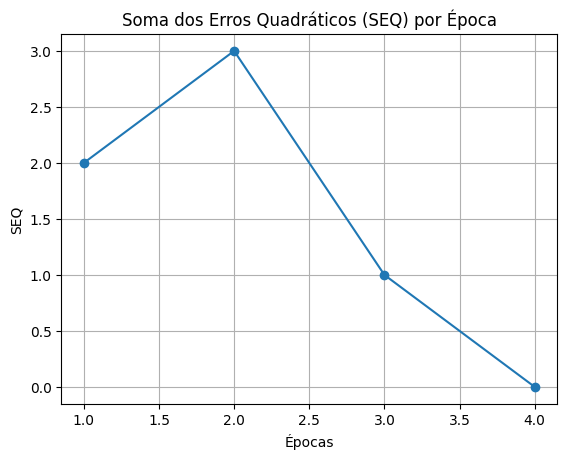

X: 
 [[0 1 0 1]
 [0 0 1 1]]
Y: 
 [[0 0 0 1]]


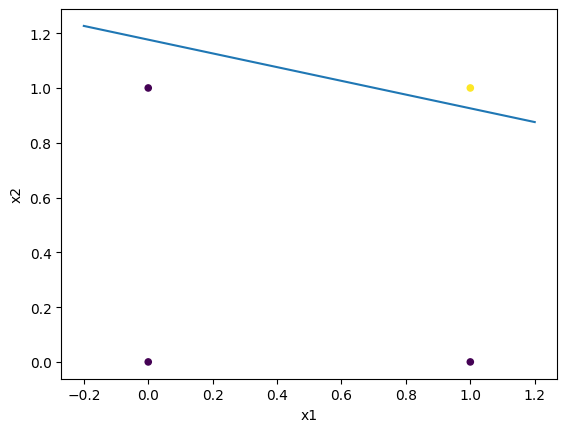

In [ ]:
#AND
print('Resultados AND')
#inicializa pesos w e bias
w = np.array(np.random.rand(1,np.size(x, 0))) * 2 -1
b = np.array(np.random.rand(1,1)) * 2 - 1

alfa = 1.2
max_epocas = 10
tolerancia = 0.001
yd = [0, 0, 0, 1]                               #y esperado

w, b, vetor_seq = treina_perceptron(w,b,x,yd,alfa, max_epocas, tolerancia)

y = yperceptron(w,b,x, degree)
plot_SEQ(vetor_seq)
print("X: \n", x)
print("Y: \n", y)

plotadc2d(x, y)
plotareta(w, b, [-0.2, 1.2])
plt.show()


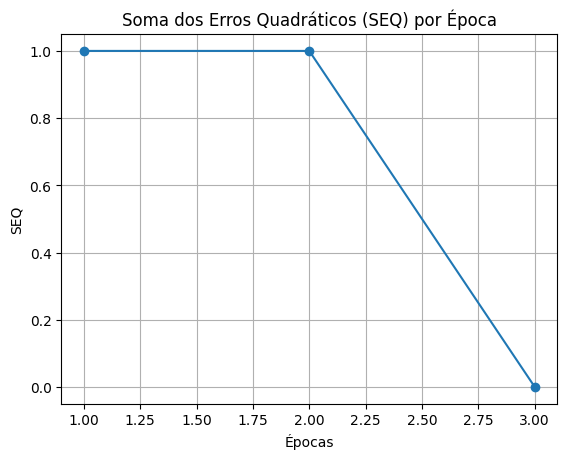

X: 
 [[0 1 0 1]
 [0 0 1 1]]
Y: 
 [[0 1 1 1]]


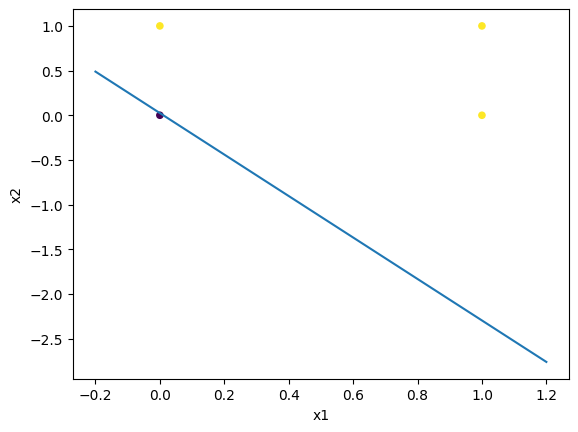

In [ ]:
#OR

#inicializa pesos w e bias
w = np.array(np.random.rand(1,np.size(x, 0))) * 2 -1
b = np.array(np.random.rand(1,1)) * 2 - 1

alfa = 1.2
max_epocas = 10
tolerancia = 0.001
yd = [0, 1, 1, 1]                               #y esperado

w, b, vetor_seq = treina_perceptron(w,b,x,yd,alfa, max_epocas, tolerancia)

y = yperceptron(w,b,x, degree)
plot_SEQ(vetor_seq)
print("X: \n", x)
print("Y: \n", y)

plotadc2d(x, y)
plotareta(w, b, [-0.2, 1.2])
plt.show()
